In [121]:
import math
from itertools import groupby
import collections
import numpy as np
import matplotlib.pyplot as plt
import itertools 
import pylab as pl
from matplotlib import collections  as mc

# Input processing

In [122]:
name ='chicago'

In [123]:
f = open(name+'A.txt')
fcontents = f.read()
# can delete
# print(type(fcontents))
# print(fcontents)

In [124]:
def split_line(text):
    # split the text
    words = text.split()
    answer = [] 
    # for each word in the line:
    for word in words:
        # print the word
        answer.append(word)
    return answer

In [125]:
def coerce_int(text):
    answer= []
    for word in text:
        answer.append(int(word))
    return answer

In [126]:
edge = coerce_int(split_line(fcontents)) # an integer array of length 2*e of edge information, 1-start
n = max(edge)
e = int(len(edge)/2)
for i in range(len(edge)):
    edge[i] -= 1
# now edge is 0-start. It will remain this way.

# Creating edge and vertex objects

In [127]:
class Edge(object):
#    def method_a(self, foo):
#        print (self.x + ' ' + foo)
    def __init__(self): 
        self.x = "hello" # can delete
        self.invertex = -1
        self.outvertex = -1
        self.edgeWeight = -1
        self.edgePQ = -1
#arr[1].method_a('Sailor!')  # can delete

In [128]:
class Vertex(object):
    def __init__(self):
        self.degree = -1
        self.rep = -1
        self.componentSize = 0 # will update later
        self.death = -1
        self.index = -1
        self.merge = -1 # in the end, merge == -1 if either the vertex is the main branch, or if it got merged along as a byproduct of another vertex merging 
        self.branchSize = [1] # will update later
        self.branchTime = [-1]
    def equal(self,v):
        if v.index == self.index:
            return True
        return False

In [129]:
arrV  = [Vertex() for i in range(n)]
for i in range(n):
    arrV[i].rep = i
    arrV[i].index = i

In [130]:
arrE  =[Edge() for i in range(e)]
for i in range(int(len(edge)/2)):
    if edge[2*i] < edge[2*i+1]:
        arrE[i].invertex = edge[2*i]
        arrE[i].outvertex = edge[2*i+1]
    else:
        arrE[i].invertex = edge[2*i+1]
        arrE[i].outvertex = edge[2*i]

# Cleaning up edges: deleting non-unique edges 
# (can ignore if no non-unique edge)

In [131]:
tmp1 = []
tmp2 = []
for i in range(int(len(edge)/2)-1):
    if edge[2*i] < edge[2*i+1]:
        tmp1.append(edge[2*i])
        tmp2.append(edge[2*i+1])
    else:
        tmp2.append(edge[2*i])
        tmp1.append(edge[2*i+1])

In [132]:
adjMatrix = [[0 for i in range(n)] for j in range(n)]
for i in range(int(len(edge)/2)):
    if edge[2*i] < edge[2*i+1]:
        adjMatrix[edge[2*i]][edge[2*i+1]] +=1
    else:
        adjMatrix[edge[2*i+1]][edge[2*i]] +=1
uniqueEdge=[]
for i in range(n):
    for j in range(n):
        if adjMatrix[i][j] != 0:
            uniqueEdge.append(i)
            uniqueEdge.append(j)

In [133]:
edge = uniqueEdge
e = int(len(edge)/2)
arrE  =[Edge() for i in range(e)]
for i in range(int(len(edge)/2)):
    if edge[2*i] < edge[2*i+1]:
        arrE[i].invertex = edge[2*i]
        arrE[i].outvertex = edge[2*i+1]
    else:
        arrE[i].invertex = edge[2*i+1]
        arrE[i].outvertex = edge[2*i]

# Setting up vertex degree, edge weights, edge priority queue

In [134]:
# can delete
# print(len(uniqueEdge)) 
# print(len(edge))
# print(uniqueEdge)
# print(uniqueEdge)

In [135]:
# degreeDic = {x:uniqueEdge.count(x) for x in uniqueEdge}

In [136]:
# degreeA, degreeB = degreeDic.keys(), degreeDic.values()

In [137]:
# degreeB

In [138]:
#import collections
#a = [1,1,1,1,2,2,2,2,3,3,4,5,5]
#counter=collections.Counter(a)
#print(counter)
## Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})
#print(counter.values())
## [4, 4, 2, 1, 2]
#print(counter.keys())
## [1, 2, 3, 4, 5]
#print(counter.most_common(3))
## [(1, 4), (2, 4), (3, 2)]

In [139]:
#degreeCounter  = collections.Counter(uniqueEdge)
#print(degreeCounter)
#print(degreeCounter.values())
#print(degreeCounter.keys())
#degreeCounter.get(1)

In [140]:
degreeCounter  = collections.Counter(uniqueEdge) # be CAREFUL. Here I use uniqueEdge. Don't need to if dne non-unique edges
for i in range(n):
    arrV[i].degree = degreeCounter.get(i)
    arrV[i].branchTime[0] = arrV[i].degree
for i in range(e):
    arrE[i].edgeWeight = min(arrV[arrE[i].invertex].degree,arrV[arrE[i].outvertex].degree )

In [141]:
# can delete
#for i in range(n):
#   print(arrV[i].degree)
#for i in range(e):
#    print(arrE[i].edgeWeight)

In [142]:
arrEdgeWeight = []
for i in range(e):
    arrEdgeWeight.append(arrE[i].edgeWeight)

In [143]:
arrEdgePQ = sorted(range(len(arrEdgeWeight)), key=lambda k:arrEdgeWeight[k])
for i in range(e):
    arrE[arrEdgePQ[i]].edgePQ = e-1-i #0-start

In [144]:
# debugging
#for i in range(e):
#    print(arrE[i].edgePQ)

In [145]:
arrEdgePQ = [0]*e
for i in range(e):
    arrEdgePQ[arrE[i].edgePQ] = i

In [146]:
# can delete
# len(arrEdgeWeight)

In [147]:
# can delete
# len(sorted(range(len(arrEdgeWeight)), key=lambda k:arrEdgeWeight[k]))

In [148]:
# can delete
# sorted(range(len(arrEdgeWeight)), key=lambda k:arrEdgeWeight[k])

In [149]:
# debugging
#for i in range(e):
#    print(arrE[i].edgePQ)

In [150]:
# debugging
# print(arrE[0].edgePQ)
# print(arrEdgePQ)

# Union-find

In [151]:
def get_last(a):
    return a[len(a)-1]

In [152]:
# disjoint-set union-find, comparing rep's degree. Merge to the larger degreed rep.
for k in range(e):
    i = arrEdgePQ[k]
    currE = arrE[i] # edges are stored in an array of edges, called arrE. This is an index.
    w=currE.outvertex # index of the out-vertex
    v= currE.invertex # index of the in-vertex
    repV = arrV[v].rep # vertices are stored in an array of vertices, called arrV. This is an index.
    repW = arrV[w].rep # This is an index.
    if arrV[v].rep != arrV[w].rep: 
        branchCounter = 0
        if arrV[repV].degree >= arrV[repW].degree: # union by degree
            #if repW == w:
            #    arrV[w].merge = repV
            arrV[repW].rep = repV
            arrV[repW].death = arrE[i].edgeWeight
            #arrV[w].rep = repV
            for j in range(n):
                if arrV[j].rep == repW:
                    arrV[j].rep = repV
                    if arrV[j].death == -1: # update vertex death time
                        arrV[j].death = arrE[i].edgeWeight
                        arrV[j].merge = repV
            branchCounter += get_last(arrV[repW].branchSize)
            arrV[repW].branchSize.append(0)
            arrV[repW].merge = repV
            arrV[repV].branchSize.append(get_last(arrV[repV].branchSize) + branchCounter)
            arrV[repV].branchTime.append(currE.edgeWeight)
            arrV[repW].branchTime.append(currE.edgeWeight)
        else:
                #if repV == v:
                #    arrV[v].merge = repW
                arrV[repV].rep = repW
                arrV[repV].death = arrE[i].edgeWeight
                #arrV[v].rep = repW
                for j in range(n):
                    if arrV[j].rep == repV:
                        arrV[j].rep = repW      
                        if arrV[j].death == -1: # update vertex death time
                            arrV[j].death = arrE[i].edgeWeight
                            arrV[j].merge = repW
                branchCounter += get_last(arrV[repV].branchSize)
                arrV[repV].branchSize.append(0)
                arrV[repV].merge = repW
                arrV[repW].branchSize.append(get_last(arrV[repW].branchSize) +branchCounter)
                arrV[repV].branchTime.append(currE.edgeWeight)
                arrV[repW].branchTime.append(currE.edgeWeight)

In [153]:
for i in range(n):
    arrV[arrV[i].rep].componentSize +=1

In [154]:
n

1467

In [155]:
e

1298

# Printing union-find results out

In [156]:
for i in range(n):
    print(str(i) + ' '+ str(arrV[i].componentSize)+' '+str(arrV[i].rep) + ' '+str(arrV[i].degree)+' '+str(arrV[i].death) + ' '+str(arrV[i].merge)+' '+str(arrV[i].branchSize)+' '+str(arrV[i].branchTime))

0 0 589 1 1 589 [1, 0] [1, 1]
1 0 589 8 8 9 [1, 0] [8, 8]
2 0 589 1 1 589 [1, 0] [1, 1]
3 0 589 1 1 589 [1, 0] [1, 1]
4 0 589 1 1 589 [1, 0] [1, 1]
5 0 589 1 1 589 [1, 0] [1, 1]
6 0 589 1 1 589 [1, 0] [1, 1]
7 0 589 1 1 589 [1, 0] [1, 1]
8 0 589 1 1 589 [1, 0] [1, 1]
9 0 589 11 5 952 [1, 40, 41, 42, 43, 44, 45, 46, 0] [11, 11, 10, 10, 9, 8, 7, 5, 5]
10 0 589 1 1 589 [1, 0] [1, 1]
11 0 589 1 1 589 [1, 0] [1, 1]
12 0 589 1 1 589 [1, 0] [1, 1]
13 0 589 1 1 589 [1, 0] [1, 1]
14 0 589 1 1 589 [1, 0] [1, 1]
15 0 589 1 1 589 [1, 0] [1, 1]
16 0 589 1 1 589 [1, 0] [1, 1]
17 0 589 1 1 589 [1, 0] [1, 1]
18 0 589 1 1 589 [1, 0] [1, 1]
19 0 589 1 1 589 [1, 0] [1, 1]
20 0 589 11 11 9 [1, 39, 0] [11, 11, 11]
21 0 589 1 1 589 [1, 0] [1, 1]
22 0 589 1 1 589 [1, 0] [1, 1]
23 0 589 1 1 589 [1, 0] [1, 1]
24 0 589 1 1 589 [1, 0] [1, 1]
25 0 589 1 1 589 [1, 0] [1, 1]
26 0 589 1 1 589 [1, 0] [1, 1]
27 0 589 1 1 589 [1, 0] [1, 1]
28 0 589 1 1 589 [1, 0] [1, 1]
29 0 589 1 1 589 [1, 0] [1, 1]
30 0 589 1 1 589 [

# Interpreting results + Graphing

In [35]:
# reference
# http://www.pythonforbeginners.com/files/reading-and-writing-files-in-python
# http://stackoverflow.com/questions/2967194/open-in-python-does-not-create-a-file-if-it-doesnt-exist
file = open(name+'D.txt', 'w+')
for i in range(n):
    file.write(str(i) + ','+ str(arrV[i].componentSize)+','+str(arrV[i].rep) + ','+str(arrV[i].degree)+','+str(arrV[i].death) + ','+str(arrV[i].merge)+','+str(arrV[i].branchSize)+','+str(arrV[i].branchTime))
    file.write('\n')
file.close() 

In [36]:
birthArr = []
deathArr = []
for i in range(n):
    birthArr.append(arrV[i].degree)
    deathArr.append(arrV[i].death)

In [37]:
# reference: draw graphs
# http://stackoverflow.com/questions/6834483/how-do-you-create-line-segments-between-two-points
# http://stackoverflow.com/questions/21352580/matplotlib-plotting-numerous-disconnected-line-segments-with-different-colors
#lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)], [[3,4],[5,6]]]

segs = np.zeros((n,2,2),int)
segs[:,0,1] = birthArr #birth
segs[:,1,0] = birthArr #birth
segs[:,1,1] = birthArr #birth
segs[:,0,0] = deathArr #death

#  segs
# [[[000 D0, 001 B0],[010 B0, 011 B0]],
#  [[100 D1, 101 B1],[110 B1, 111 B1]],
#  [[200 D2, 201 B2],[210 B2, 211 B2]]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mc.LineCollection(segs, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.title(name+'Persistence')
pl.savefig(name+'P.png', bbox_inches='tight')
#plt.show()

In [38]:
# for reference
#import matplotlib.pyplot as plt
#import itertools 

#fig=plt.figure()
#ax=fig.add_subplot(111)
#all_data = [[1,10],[2,10],[3,10],[4,10],[5,10],[3,1],[3,2],[3,3],[3,4],[3,5]]
#plt.plot(
#    *zip(*itertools.chain.from_iterable(itertools.combinations(all_data, 2))),
#    color = 'brown', marker = 'o')

#pylab.savefig('foo.png', bbox_inches='tight')
#plt.show()
#pylab.savefig('foo.png', bbox_inches='tight')

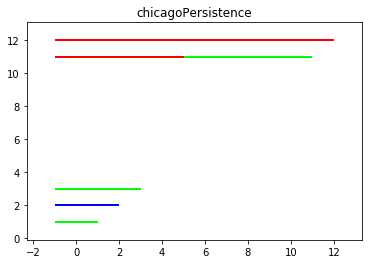

In [39]:
plt.show()

In [40]:
# for safety check
#for i in range(n):
#    if arrV[i].degree is None:
#        print(i)

In [41]:
maxBranchLength = 0
maxBranchIndex = -1
for i in range(n):
    tmp = len(arrV[i].branchSize)
    if maxBranchLength < tmp:
        maxBranchIndex = i
        maxBranchLength = tmp

In [42]:
# reference: both save graph and plot graph / plot color
# http://stackoverflow.com/questions/21875356/saving-a-figure-after-invoking-pyplot-show-results-in-an-empty-file
# http://matplotlib.org/api/colors_api.html
plt.plot(arrV[maxBranchIndex].branchSize, color  = 'g')
plt.title(name+': size Growth of the longest Branch')
plt.ylabel('y = the number of nodes in the branch')
plt.xlabel('x = the number of updates')
plt.savefig(name+'GB.png', bbox_inches='tight')

# scratch

In [558]:
from ete2 import Tree, TreeStyle
t = Tree()
t.populate(10, random_dist=True)
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True
t.show(tree_style=ts)

ImportError: No module named 'ete2'